1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\lida\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv",index_col = 0)
df.head(10)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
6,No,Yes,919.588530,7491.558572
7,No,No,825.513331,24905.226578
8,No,Yes,808.667504,17600.451344
9,No,No,1161.057854,37468.529288
10,No,No,0.000000,29275.268293


2) Convert `default` and `student` to categorical variables.

In [3]:
df= df.replace("No",0).replace("Yes",1)
df.head(10)

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
6,0,1,919.588530,7491.558572
7,0,0,825.513331,24905.226578
8,0,1,808.667504,17600.451344
9,0,0,1161.057854,37468.529288
10,0,0,0.000000,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

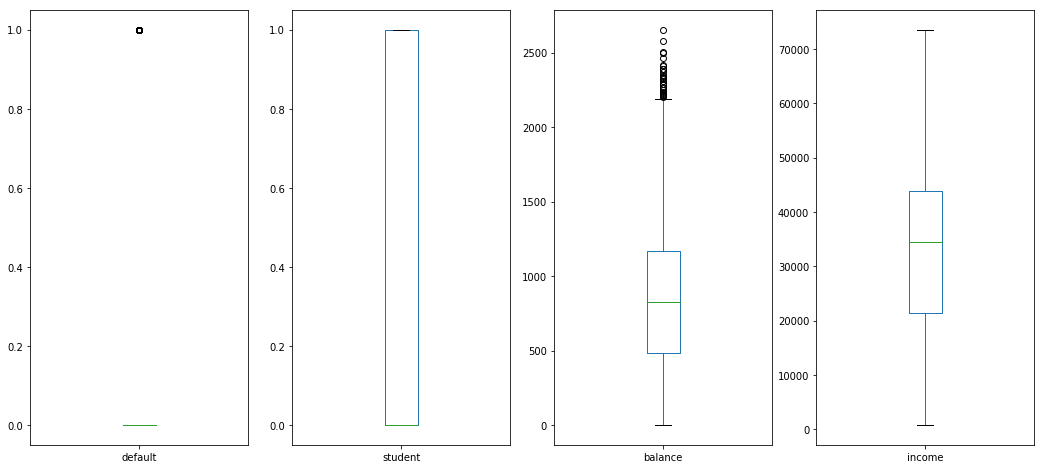

In [4]:
fig = plt.figure(figsize = (18,8))

fig1 = fig.add_subplot(1,4,1)
df['default'].plot.box()
fig2 = fig.add_subplot(1,4,2)
df['student'].plot.box()
fig3 = fig.add_subplot(1,4,3)
df['balance'].plot.box()
fig4 = fig.add_subplot(1,4,4)
df['income'].plot.box()

plt.show()


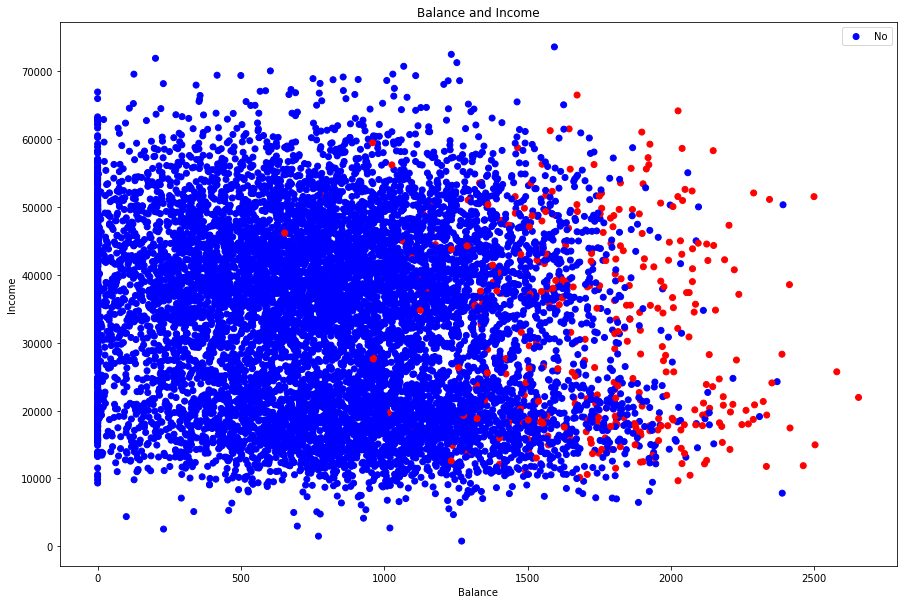

In [5]:
colors= {0:"blue",1:"red"}
plt.figure(figsize=(15,10))
plt.scatter(df["balance"],df["income"],c = df["default"].apply(lambda x:colors[x]))

plt.title("Balance and Income")
plt.xlabel("Balance");plt.ylabel("Income")

plt.legend(['No'])
plt.show()


4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

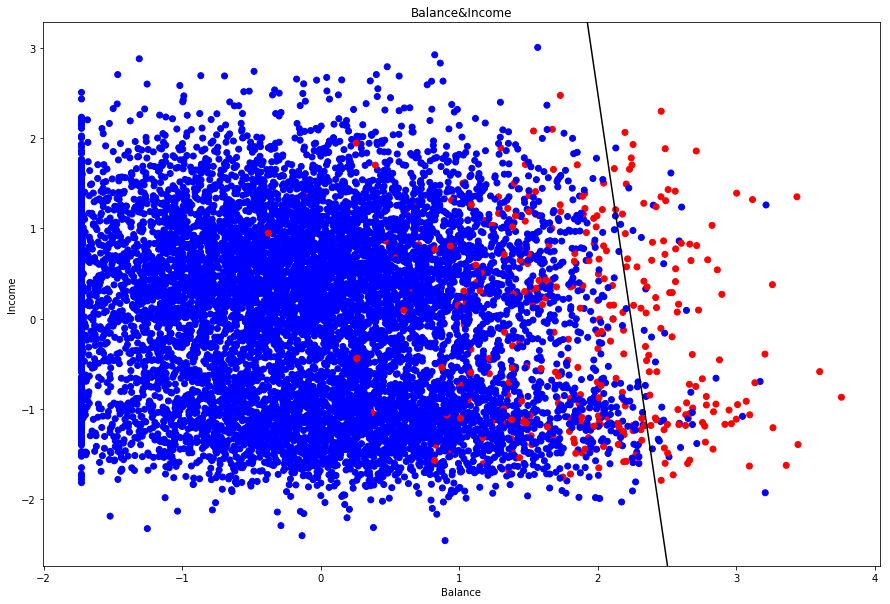

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split data
X = df[["balance","income"]]
y = df["default"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#train model
regr = LogisticRegression(penalty = "l1")
model1 = regr.fit(X_train,y_train)

#plot scatter plot

colors= {0:"blue",1:"red"}
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(X[:,0],X[:,1],c = df["default"].apply(lambda x:colors[x]))
plt.title("Balance&Income")
plt.xlabel("Balance")
plt.ylabel("Income")

#decision boundary 
b = model1.intercept_
coef = model1.coef_[0]

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

x = np.arange(x_min, x_max, 1)
y = (b + coef[0] * x) / -coef[1]

plt.plot(x, y, c='black')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


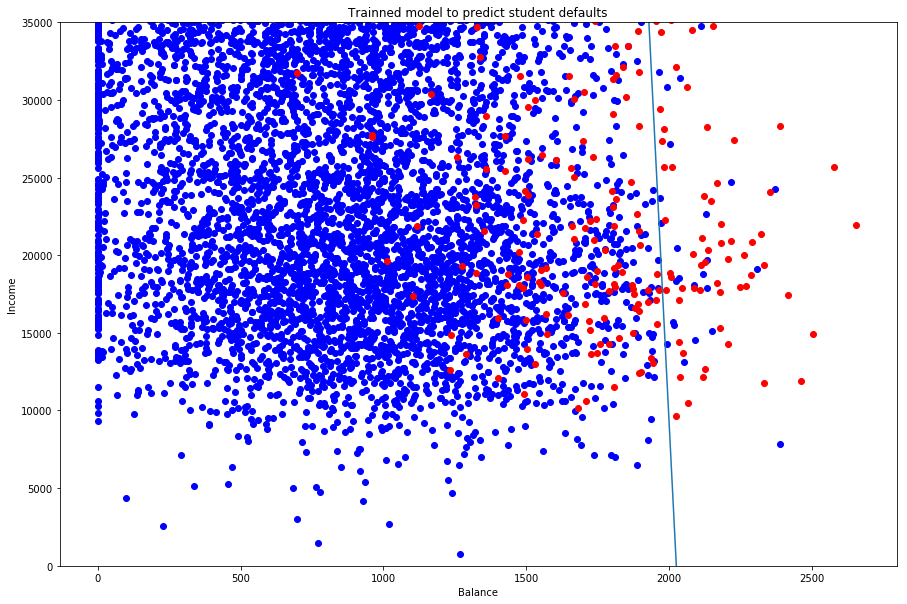

In [17]:
X = df[["balance","income"]]
y = df["default"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 666)

model = LogisticRegression(penalty = "l1")
fit = model.fit(X_train,y_train)
plt.figure(figsize=(15,10))

plt.scatter(df.balance[df['default']==0], df.income[df['default']==0],c='blue')
plt.scatter(df.balance[df['default']==1], df.income[df['default']==1],c='red')
plt.title("Trainned model to predict student defaults")
plt.xlabel("Balance")
plt.ylabel("Income")

b = fit.intercept_
coef = fit.coef_[0]

x = np.arange(0, 2600, 1)
y = (b + coef[0] * x) / (-coef[1])
plt.plot(x, y)
plt.ylim(0, 35000)
plt.show()

Area under the ROC curve : 0.942674


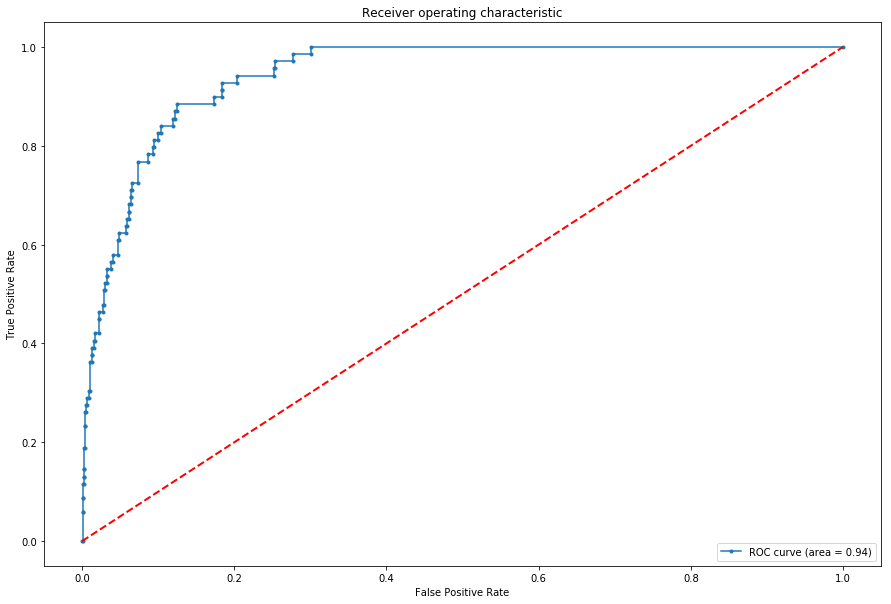

In [11]:
from sklearn.metrics import auc, roc_curve
from sklearn.datasets import make_classification

def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
plt.figure(figsize=(15,10))
generate_ROCplot(fpr,tpr,'LR',roc_auc)


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

Area under the ROC curve : 0.943545


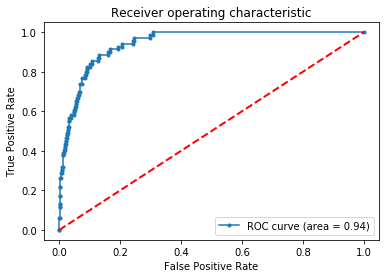

The performance after add one variable is not significantly increased 
The coefficients for balance, income and student are respectively: [ 0.06434194  0.00306679 -0.00280049]


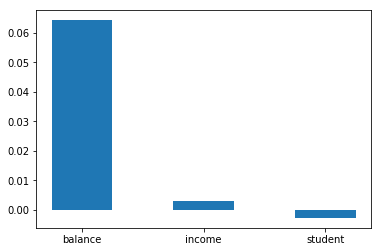

coefficient: [[2.76739883 0.26629152]]


In [12]:
from sklearn.linear_model import Ridge
X = df[["balance","income","student"]]
y = df["default"]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

alphas = np.logspace(-6, -1, 100)
score = []
for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
opt_index = np.array(score).argmax()

clf = Ridge(alpha=alphas[opt_index])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income', 'student'))
rects = ax.patches
print("The performance after add one variable is not significantly increased ")
print ('The coefficients for balance, income and student are respectively:', clf.coef_)
plt.show()

print ('coefficient:',regr.coef_)

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

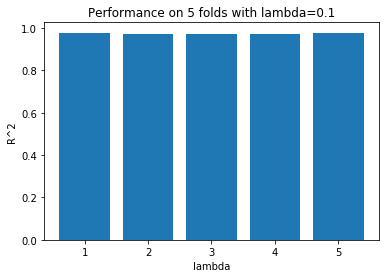

[0.97688944 0.973125   0.973125   0.970625   0.97811132]


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regr, X_train, y_train, cv=5)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.bar(range(1,6),scores)
plt.title('Performance on 5 folds with lambda=0.1')
plt.show()
print(scores)

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from pydotplus import *
X = df.drop(["default"],1)
y = df.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

8) Find the optimal decision tree depth and compute the AUC ROC. 

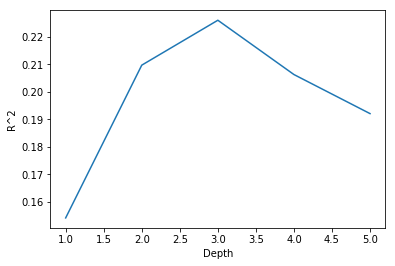

depth: 5
Area under the ROC curve : 0.921757


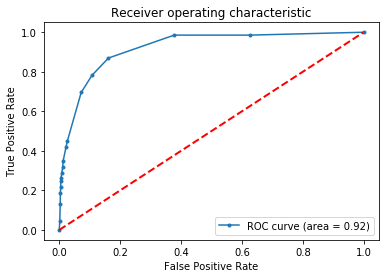

depth: 4
Area under the ROC curve : 0.932550


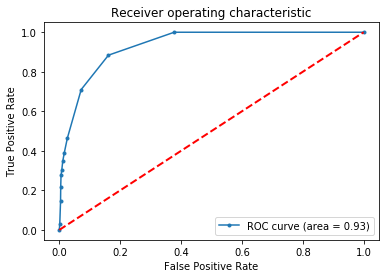

depth: 3
Area under the ROC curve : 0.896562


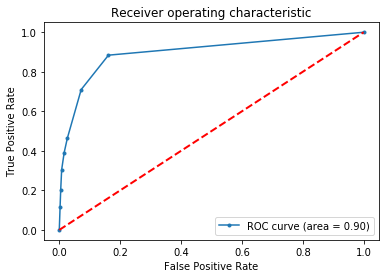

depth: 2
Area under the ROC curve : 0.828181


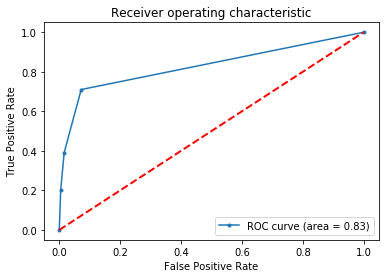

depth: 1
Area under the ROC curve : 0.687625


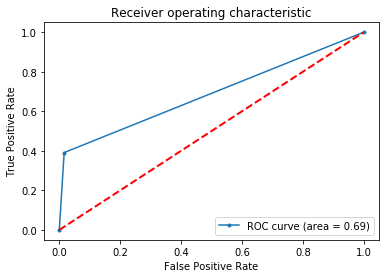

In [15]:
from sklearn.tree import DecisionTreeRegressor

train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
plt.show()

all_area=[]
print("depth:",n_opt+2)
fpr,tpr,roc_auc1, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt+2)
generate_ROCplot(fpr,tpr,'LR',roc_auc1)
all_area.append(roc_auc1)

print("depth:",n_opt+1)
fpr,tpr,roc_auc2, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt+1)
generate_ROCplot(fpr,tpr,'LR',roc_auc2)
all_area.append(roc_auc2)

print("depth:",n_opt)
fpr,tpr,roc_auc3, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt)
generate_ROCplot(fpr,tpr,'LR',roc_auc3)
all_area.append(roc_auc3)

print("depth:",n_opt-1)
fpr,tpr,roc_auc4, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt-1)
generate_ROCplot(fpr,tpr,'LR',roc_auc4)
all_area.append(roc_auc4)

print("depth:",n_opt-2)
fpr,tpr,roc_auc5, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt-2)
generate_ROCplot(fpr,tpr,'LR',roc_auc5)
all_area.append(roc_auc5)

max_area=max(all_area)
if max_area==roc_auc1:
    opt_depth=n_opt+2
elif max_area==roc_auc2:
    opt_depth=n_opt+1
elif max_area==roc_auc3:
    opt_depth=n_opt
elif max_area==roc_auc4:
    opt_depth=n_opt-1
elif max_area==roc_auc5:
    opt_depth=n_opt-2